In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data

In [4]:
!pip install pandas_datareader

In [5]:
import pandas as pd
company="MSFT"
start='2022-05-15'
end='2022-10-15'

stocks=data.DataReader(name=company, data_source='yahoo', start=start, end=end)
pd.PeriodIndex(stocks.index, freq='D')

PeriodIndex(['2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
             '2022-05-20', '2022-05-23', '2022-05-24', '2022-05-25',
             '2022-05-26', '2022-05-27',
             ...
             '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
             '2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
             '2022-10-13', '2022-10-14'],
            dtype='period[D]', name='Date', length=106, freq='D')

In [6]:
stocks.truncate(before='22-05-15', after='2022-10-15' )
stocks.reset_index(inplace = True)
stocks.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2022-05-16,265.820007,255.779999,259.959991,261.500000,32550900.0,260.339752
1,2022-05-17,268.329987,262.459991,266.109985,266.820007,28828800.0,265.636169
2,2022-05-18,263.600006,252.770004,263.000000,254.080002,31356000.0,253.541840
3,2022-05-19,257.670013,251.880005,253.899994,253.139999,32692300.0,252.603821
4,2022-05-20,258.540009,246.440002,257.239990,252.559998,39199300.0,252.025055


In [7]:
len(stocks.Date)

106

In [8]:
import matplotlib.pyplot as plt

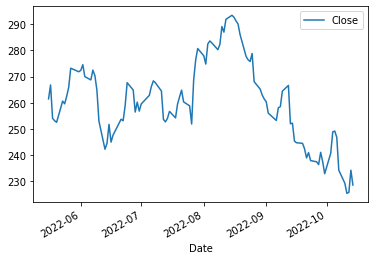

In [9]:
stocks_Close = stocks[['Date', 'Close']]
stocks_Close.plot(x='Date', y='Close')
plt.show()

<AxesSubplot:>

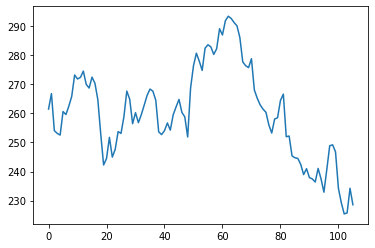

In [10]:
df = stocks_Close[['Date', 'Close']]
df.rename(columns = {'Close':'value'}, inplace=True)
df.value.plot()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

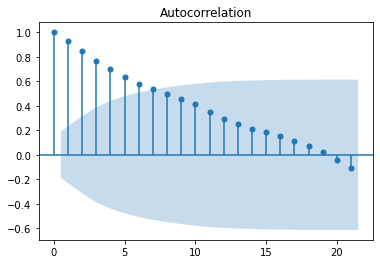

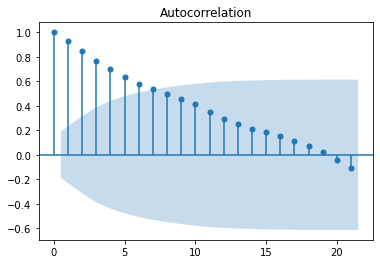

In [12]:
plot_acf(df.value)

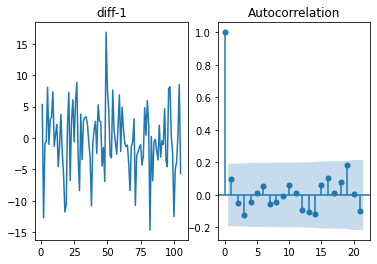

In [13]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-1')
ax1.plot(df.value.diff())
ax2 = f.add_subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2)
plt.show()

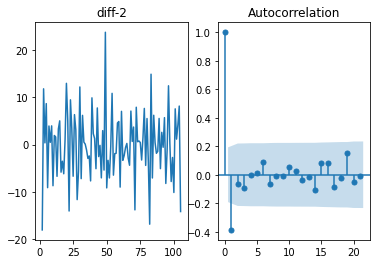

In [14]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-2')
ax1.plot(df.value.diff().diff())
ax2 = f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('p-value', result[1])
result = adfuller(df.value.diff().dropna())
print('p-value', result[1])
result = adfuller(df.value.diff().diff().dropna())
print('p-value', result[1])

p-value 0.5929881916321674
p-value 3.111957243902991e-15
p-value 1.0722611263188041e-12


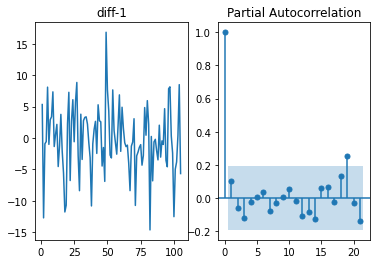

In [16]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-1')
ax1.plot(df.value.diff())
ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

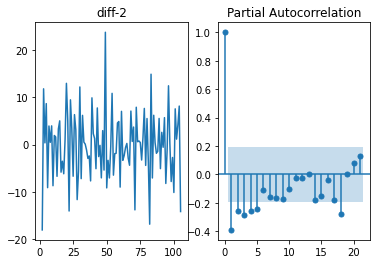

In [17]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-2')
ax1.plot(df.value.diff().diff())
ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [18]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(df.value, order=(1,1,2))
model = arima_model.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  105
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -323.368
Method:                       css-mle   S.D. of innovations              5.263
Date:                Mon, 31 Oct 2022   AIC                            656.736
Time:                        21:23:35   BIC                            670.006
Sample:                             1   HQIC                           662.114
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3157      0.581     -0.543      0.587      -1.455       0.824
ar.L1.D.value    -0.8128      0.374     -2.173      0.030      -1.546      -0.080
ma.L1.D.value     0.9312      0.383     

C:\Users\opel\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\opel\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

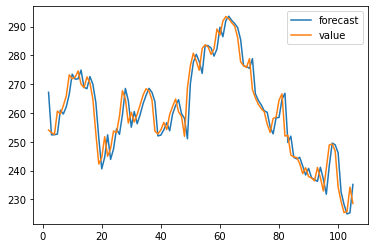

In [19]:
model.plot_predict(dynamic=False)
plt.show()

Теперь возьмем разные периоры для оценки прогноза модели. В первом случае обучающая выборка 0-75, т.е. когда уже произошла смена тренда и 0-65, до начала смены тренда.

In [20]:
arima_model = ARIMA(df.value[:75], order=(1,1,5))
model = arima_model.fit()
print(model.summary())

C:\Users\opel\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   74
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -226.872
Method:                       css-mle   S.D. of innovations              5.184
Date:                Mon, 31 Oct 2022   AIC                            469.744
Time:                        21:27:30   BIC                            488.177
Sample:                             1   HQIC                           477.097
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0084      0.662     -0.013      0.990      -1.307       1.290
ar.L1.D.value    -0.9999      0.033    -30.459      0.000      -1.064      -0.936
ma.L1.D.value     1.1560      0.105     

C:\Users\opel\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\opel\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning